## Loading images from directory as dataset

In [1]:
img_width, img_height = 100, 100
input_shape = (img_width, img_height, 1)
batch_size = 32
output_classes = 62

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255, 
                                     shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

train_ds = train_generator.flow_from_directory(
    directory="./train",
    target_size = (img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

validation_ds = data_generator.flow_from_directory(
    directory="./val",
    target_size = (img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

test_ds = test_generator.flow_from_directory(
    directory="./test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
)

Found 2356 images belonging to 62 classes.
Found 682 images belonging to 62 classes.
Found 372 images belonging to 62 classes.


## Building CNN model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization


In [4]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', input_shape = (100, 100, 1), activation = 'relu'))
# model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(Conv2D(64, kernel_size = (3, 3),activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(62, activation = 'softmax'))

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_classes, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [7]:
# from keras import optimizers

# model.compile(
#     optimizers.RMSprop(learning_rate=0.0001),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train/Fit the model

In [9]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=6,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [10]:
epochs_range = 100
# Train the model
history = model.fit(train_ds, validation_data=validation_ds, 
                    epochs=epochs_range,callbacks = callback,
                    steps_per_epoch=train_ds.samples // batch_size,
                    validation_steps=validation_ds.samples // batch_size)

Epoch 1/100
73/73 [==============================] - 126s 2s/step - loss: 4.0438 - accuracy: 0.0366 - val_loss: 3.5021 - val_accuracy: 0.1443
Epoch 2/100
73/73 [==============================] - 94s 1s/step - loss: 3.2239 - accuracy: 0.1919 - val_loss: 2.4625 - val_accuracy: 0.4018
Epoch 3/100
73/73 [==============================] - 92s 1s/step - loss: 2.3069 - accuracy: 0.3911 - val_loss: 1.9461 - val_accuracy: 0.5446
Epoch 4/100
73/73 [==============================] - 94s 1s/step - loss: 1.6664 - accuracy: 0.5361 - val_loss: 1.6943 - val_accuracy: 0.6101
Epoch 5/100
73/73 [==============================] - 94s 1s/step - loss: 1.2945 - accuracy: 0.6407 - val_loss: 1.6135 - val_accuracy: 0.6295
Epoch 6/100
73/73 [==============================] - 72s 988ms/step - loss: 1.0915 - accuracy: 0.6682 - val_loss: 1.6105 - val_accuracy: 0.6473
Epoch 7/100
73/73 [==============================] - 61s 842ms/step - loss: 0.9090 - accuracy: 0.7319 - val_loss: 1.4696 - val_accuracy: 0.6815
Epoch 

## Plot the result

In [11]:
import matplotlib.pyplot as plt

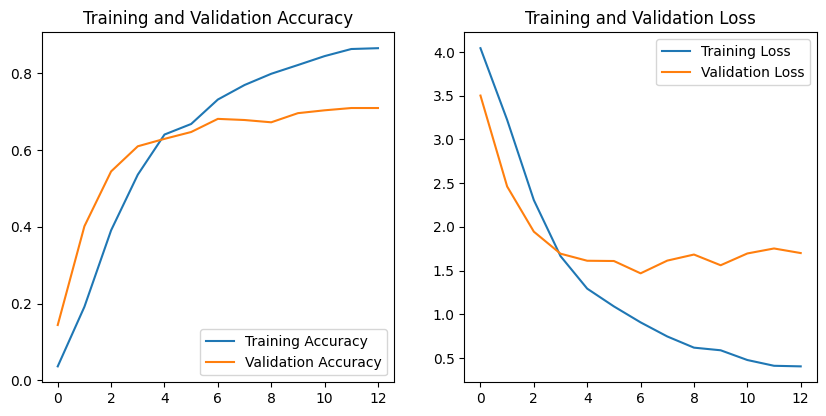

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the model

In [14]:
# Save the model as model.h5
model.save('basic_model.h5')

In [16]:
# Print the class indices 
print("Prediction Dict: ", train_ds.class_indices)

Prediction Dict:  {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '58': 54, '59': 55, '6': 56, '60': 57, '61': 58, '7': 59, '8': 60, '9': 61}
